TensorFlow 버전 2.x 선택

In [0]:
%tensorflow_version 2.x
# pycharm에서 돌리면 이 코드는 필요하지 않다.

In [0]:
import tensorflow as tf

In [112]:
print(tf.__version__)

2.1.0


In [113]:
import keras
print(keras.__version__)

2.2.5




1.MNIST 데이터 로드




In [0]:
from tensorflow.keras.datasets import mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [115]:
# 데이터 구조 확인
print(f'x_train:{x_train.shape} ,y_train:{y_train.shape}')
print(f'x_test:{x_test.shape} ,y_test:{y_test.shape}')

x_train:(60000, 28, 28) ,y_train:(60000,)
x_test:(10000, 28, 28) ,y_test:(10000,)


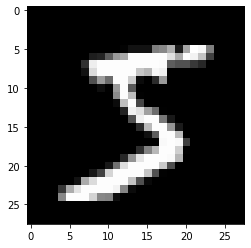

In [116]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0] , cmap = 'gray')
plt.show()




2.데이터 전처리



In [117]:
# Neural Network에 전송할 때 이미지는 1차원이어야 함.
# 3차원 학습 데이터(samples, height, width)를
# 2차원 데이터(samples, height * width) 모양으로 변환함.
n , h , w = x_train.shape
x_train = x_train.reshape(n , h * w)
print('x_train :',x_train.shape)

x_train : (60000, 784)


In [118]:
# x_test 데이터 (samples, height * width) 모양으로 변홤함.
n , h , w = x_test.shape
x_test = x_test.reshape(n, h * w)
print('x_test :', x_test.shape)

x_test : (10000, 784)


In [119]:
print(x_train[0]) # 이미지 데이터의 값 확인 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

 이미지 데이터는 0~255 사이의 값들로 저장되어 있다.
신경망에 보낼 때는 정규화된 값 (0. ~ 1.) 으로 보내면 더 좋은 성능이 나올 수도 있다.

In [0]:
x_train = x_train.astype('float16') / 255
x_test = x_test.astype('float16') / 255

In [121]:
print(y_train[0]) # 레이블(클래스)은 one-hot-encoding이 되어있지않다.
print(y_test[0])

5
7


In [122]:
# 학습/테스트 레이블을 one-hot-encoding 적용
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10, dtype='float16')
y_test = to_categorical(y_test, 10, dtype='float16')
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]




3.1층 Neural Network 생성




In [0]:
# 필요한 클래스들 import 하기
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Sequential 클래스 인스턴스 생성 - 생성자(constructor) 호출
model = Sequential() # 신경망 모델이라고 생각

# Dense ===> hidden layer 라는 의미라고 생각하자.
# Dense(fully-connected layer, 완전연결층)
# 신경망에 추가
model.add(Dense(512, input_dim=h*w, activation='relu'))
# 512:은닉층의 뉴런 갯수, activation : 활성화함수,

# 우리가 만든 Affine 클래스가 keras에서의 dense 이다.
# 출력층(output layer)을 신경망에 추가
model.add(Dense(10, activation='softmax'))

In [0]:
# 신경망 모델 컴파일 
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']) # metrics ==> 지표.

In [125]:
# 모델 최적화 - epoch를 반복할 때, 10회 epoch 동안 성능 향상이 없으면,
# 자동으로 학습 중단(epoch 중단)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10)

# 신경망 모델 학습 진행
history = model.fit(x_train,y_train,
                    batch_size=200, epochs=50,
                    verbose=1,
                    callbacks=[early_stop],
                    validation_data = (x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2997 - accuracy: 0.9148 - val_loss: 0.1492 - val_accuracy: 0.9554
Epoch 2/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1254 - accuracy: 0.9636 - val_loss: 0.1017 - val_accuracy: 0.9687
Epoch 3/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0823 - accuracy: 0.9764 - val_loss: 0.0852 - val_accuracy: 0.9730
Epoch 4/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0598 - accuracy: 0.9826 - val_loss: 0.0759 - val_accuracy: 0.9766
Epoch 5/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0448 - accuracy: 0.9874 - val_loss: 0.0695 - val_accuracy: 0.9792
Epoch 6/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0334 - accuracy: 0.9911 - val_loss: 0.0682 - val_accuracy: 0.9791
Epoch 7/50
60000/60000 [==============================] 

In [126]:
# 테스트 정확도 출력
acc = model.evaluate(x_test,y_test)
# evluate 메소드는 [loss,accuracy] 리스트를 리턴한다.
print('테스트의 정확도 =', acc[1]) # acc[1] ==> accuracy 값만 출력

10000/10000 [==============================] - 1s 73us/sample - loss: 0.0770 - accuracy: 0.9795
테스트의 정확도 = 0.9795


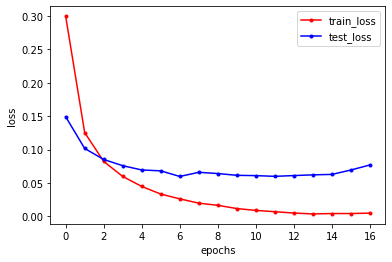

In [127]:
# 각 epoch에서 손실(loss) 그래프
# 학습 세트 손실
train_loss = history.history['loss'] # 'loss'는 학습 세트를 의미한다.
# 테스트 세트 손실
test_loss = history.history['val_loss'] # 'val_loss' 는 테스트 세트를 의미한다.

# x좌표 - epoch 횟수
x = range(len(train_loss))
plt.plot(x,train_loss,label='train_loss', c = 'red' , marker='.')
plt.plot(x,test_loss, label='test_loss', c ='blue', marker='.')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


sequential() >> compile() >> fit() 